<a href="https://colab.research.google.com/github/rashmitha-0923/DAA-handson-2-/blob/main/benchmark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Processor Details: 1 physical cores, 2 logical cores
RAM Details: svmem(total=13609422848, available=12222447616, percent=10.2, used=1051324416, free=7343767552, active=701177856, inactive=5225721856, buffers=397021184, cached=4817309696, shared=2260992, slab=238530560)
Enter the list of input sizes separated by commas (e.g., 5,10,20,50): 5 10 20 50
Input sizes: [5, 10, 20, 50]


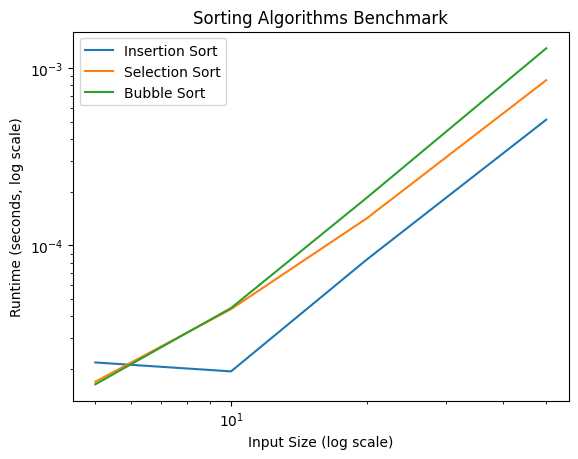

In [5]:
import timeit as ti
import matplotlib.pyplot as pt
import numpy as npm
import psutil as ps

def custom_insertion_sort(array):
    index = 1
    while index < len(array):
        current_value = array[index]
        position = index - 1

        # Simulating do-while loop
        while True:
            if position >= 0 and current_value < array[position]:
                array[position + 1] = array[position]
                position -= 1
            else:
                break

        array[position + 1] = current_value
        index += 1

def custom_selection_sort(array):
    index = 0
    while index < len(array):
        smallest_index = index
        next_index = index + 1

        while next_index < len(array):
            if array[next_index] < array[smallest_index]:
                smallest_index = next_index
            next_index += 1

        array[index], array[smallest_index] = array[smallest_index], array[index]
        index += 1

def custom_bubble_sort(array):
    length = len(array)
    i = 0
    while i < length:
        j = 0
        while j < length - i - 1:
            if array[j] > array[j + 1]:
                array[j], array[j + 1] = array[j + 1], array[j]
            j += 1
        i += 1

def measure_sorting_time(sort_algo, data_sizes):
    time_records = []
    for data_size in data_sizes:
        sample_data = npm.random.rand(data_size)
        begin_time = ti.default_timer()
        sort_algo(sample_data)
        finish_time = ti.default_timer()
        duration = finish_time - begin_time
        time_records.append(duration)
    return time_records

cpu_details = f"Processor Details: {ps.cpu_count(logical=False)} physical cores, {ps.cpu_count(logical=True)} logical cores"
ram_details = f"RAM Details: {ps.virtual_memory()}"

print(cpu_details)
print(ram_details)

# Prompt the user for input sizes
user_input = input("Enter the list of input sizes separated by commas (e.g., 5,10,20,50): ")

# Convert the input string to a list of integers
sizes = [int(size.strip()) for size in user_input.split(' ')]

print("Input sizes:", sizes)

# Benchmark and store runtimes
insertion_times = measure_sorting_time(custom_insertion_sort, sizes)
selection_times = measure_sorting_time(custom_selection_sort, sizes)
bubble_times = measure_sorting_time(custom_bubble_sort, sizes)

# Plotting
pt.plot(sizes, insertion_times, label='Insertion Sort')
pt.plot(sizes, selection_times, label='Selection Sort')
pt.plot(sizes, bubble_times, label='Bubble Sort')
pt.xscale('log')
pt.yscale('log')
pt.xlabel('Input Size (log scale)')
pt.ylabel('Runtime (seconds, log scale)')
pt.title('Sorting Algorithms Benchmark')
pt.legend()
pt.show()

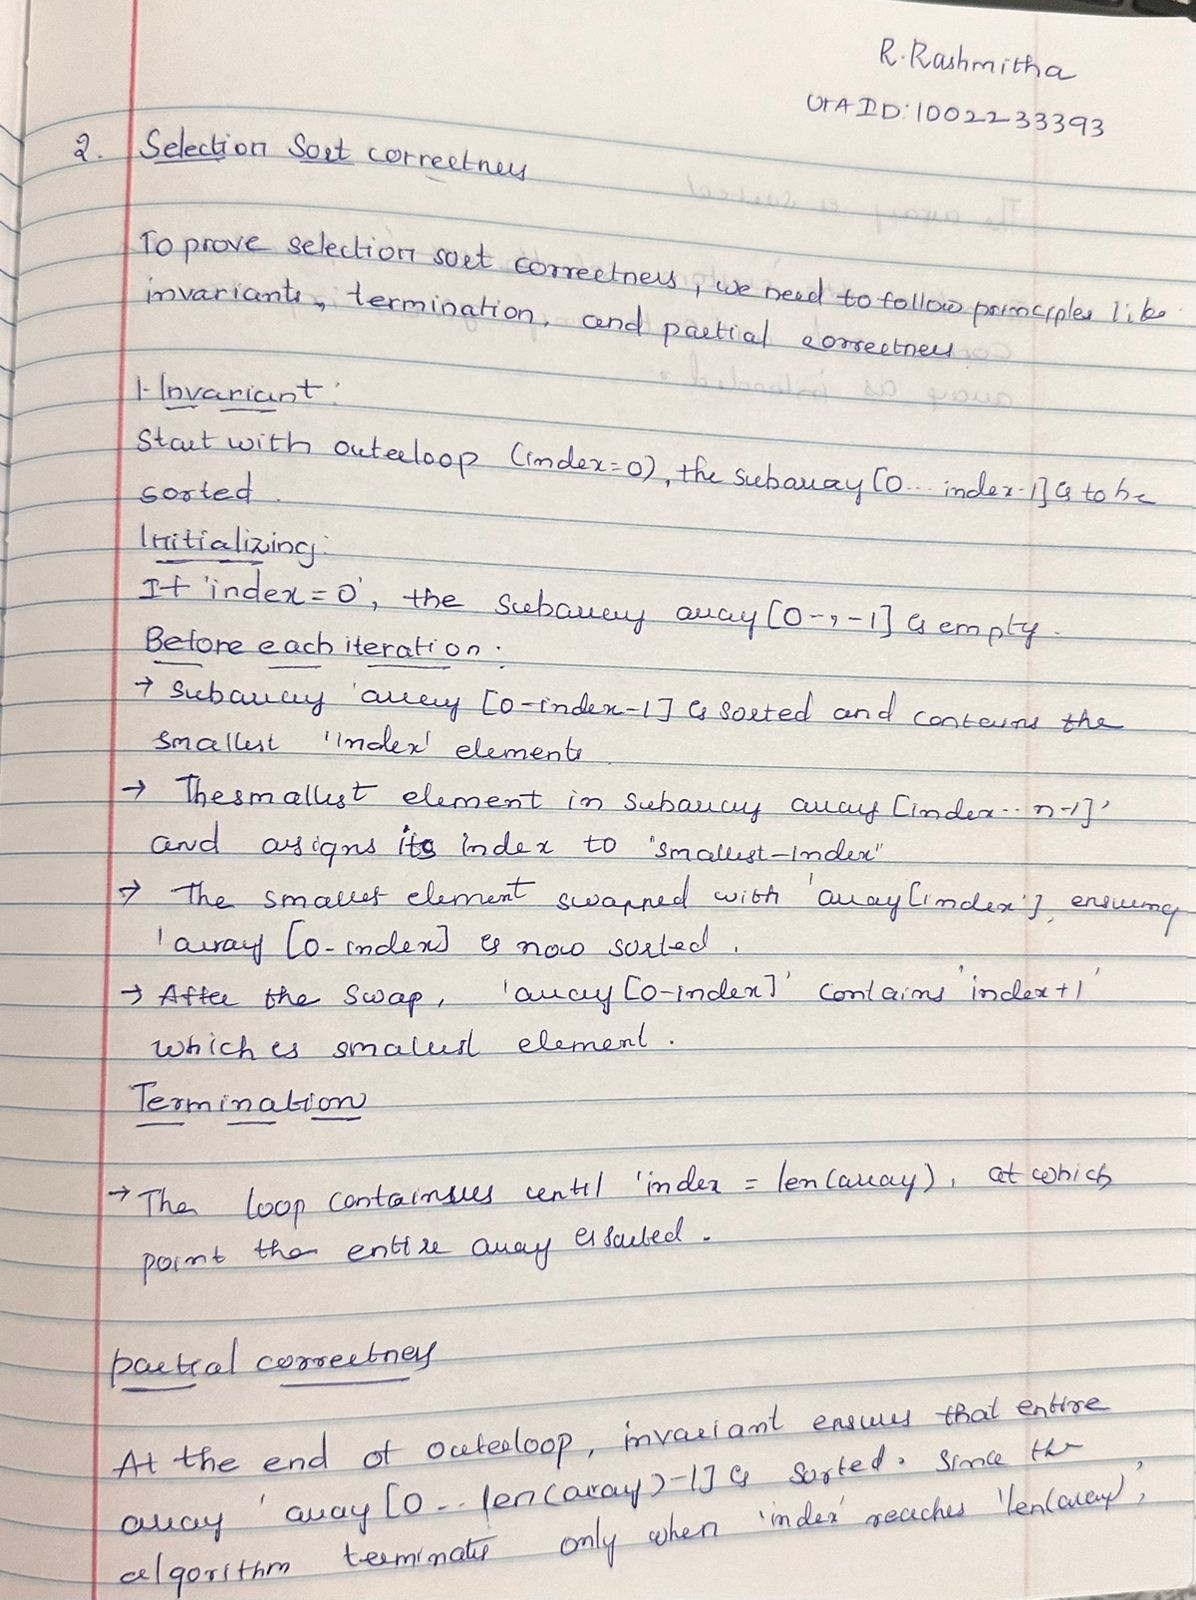

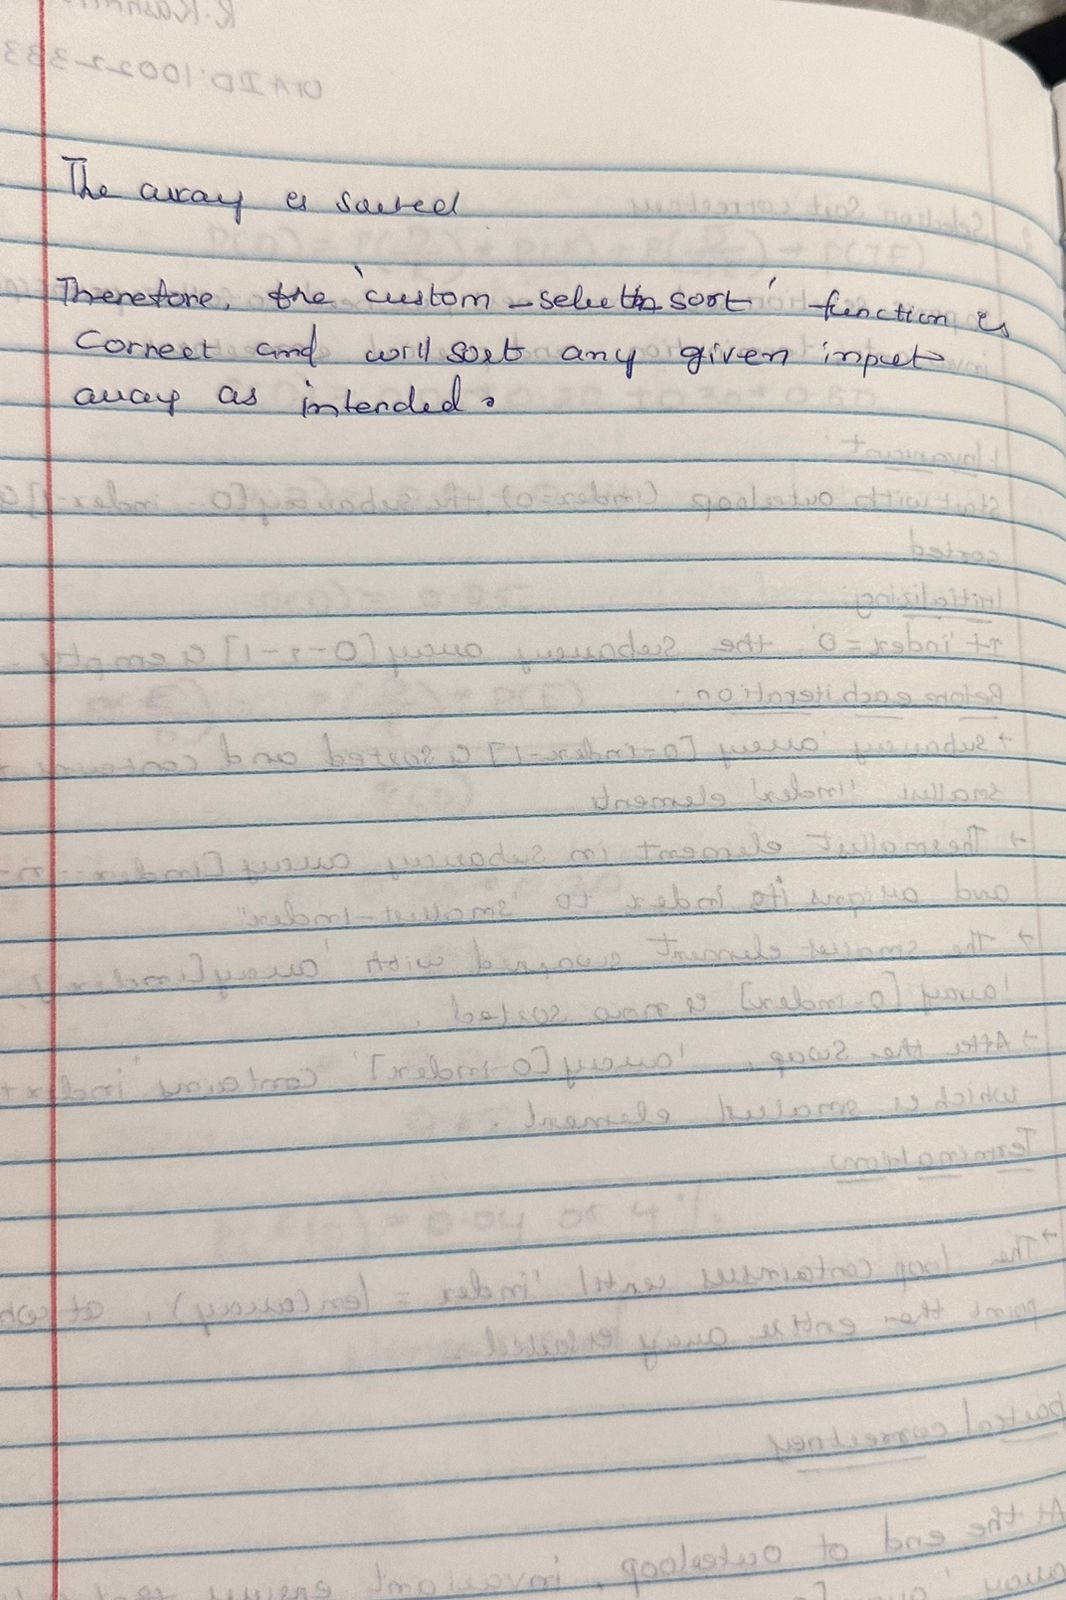